# I. Bài toán đặt ra

**<span style='color:#2B9C15'>💬 Tên bài toán </span>** 
 
 Dự đoán giá bán nhà ở, chung cư tại thủ đô Hà Nội, Việt Nam
 
 **<span style='color:#2B9C15'>💬 Giới thiệu chung </span>**

- Trong học máy, **học có giám sát** là một nhóm các thuật toán phổ biến trong lĩnh vực này và một trong những vấn đề quan trọng của học có giám sát là hồi quy(regression). Hồi quy là các bài toán liên quan đến việc dự đoán đầu ra có giá trị liên tục (predicting continous valued output).
- Và trong bài toán mà nhóm đề ra thì từ những cột thuộc tính đầu vào như diện tích căn hộ, số tầng, số phòng,.... Nhóm tiến hành dự đoán cột mục tiêu là giá bán (trên m2) của chung cư, nhà ở bằng thuật toán hồi quy tuyến tính (linear regression).

# II. Tiền xử lý dữ liệu

👉 Trước tên ta cần import và cài đặt một số thư viện cần thiết.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
sns.set_context("poster",font_scale = .7)

👉 Tiếp đến đọc file `VN_housing_dataset.csv` vào dataframe `house_df` và in ra 3 dòng đầu tiên của dataframe.

In [2]:
house_df = pd.read_csv('VN_housing_dataset.csv')
house_df.head(3)

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2.1"></a>
### <span style='color:#2B9C15'>1. Loại những thuộc tính không có ý nghĩa cho việc mô hình hóa </span>

💡 **Một số nhận xét và quyết định**

- Ta có thể thấy: Cột `Ngày`, `Địa chỉ` và `Huyện` chứa các giá trị quá riêng biệt, không có ý nghĩa cho việc trực quan hay phân tích do đó các cột này sẽ không được lựa chọn làm thuộc tính đầu vào.
- Thuộc tính `Diện tích` được tính bằng công thức `Dài`*`Rộng`, bên cạnh đó có nhiều mẫu dữ liệu không có thông tin về chiều dài và chiều rộng căn nhà mà chỉ có tổng diện tích, do đó có thể loại bỏ hai thuộc tính này để giảm độ phức tạp của mô hình.
- Các cột của bộ dữ liệu được giữ lại bao gồm: `Quận`, `Loại hình nhà ở`, `Giấy tờ pháp lý`, `Số tầng`, `Số phòng`, `Diện tích`, `Giá/m2`.
- **Đây là bước loại những thuộc tính có thể thấy ngay về mặt ý nghĩa, sau khi hoàn thành các bước tiền xử lý tiếp theo sẽ thực hiện tính correlation (hệ số tương quan) giữa từng thuộc tính với biến đầu ra để có thể đưa ra những lựa chọn chính xác hơn nữa.**

👉 Thực hiện lọc ra những cột cần thiết cho bài toán và lưu vào dataframe mới `df`.

In [3]:
df=house_df[['Quận', 'Loại hình nhà ở', 'Giấy tờ pháp lý', 'Số tầng', 'Số phòng ngủ', 'Diện tích',
             'Giá/m2']]
df.head()

,Quận,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,Quận Cầu Giấy,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,"86,96 triệu/m²"
1,Quận Thanh Xuân,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,"116,22 triệu/m²"
2,Quận Hai Bà Trưng,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,65 triệu/m²
3,Quận Tây Hồ,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,100 triệu/m²
4,Quận Thanh Xuân,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,"86,11 triệu/m²"


👉 Từ bước này, chúng ta sẽ sử dụng `df` xuyên suốt quá trình thực hiện bài toán.

<a id="2.2"></a>
### <span style='color:#2B9C15'>2. Chuyển đổi các cột không phải dạng số về dạng số </span>

In [4]:
#lọc ra các thuộc tính dạng categorical
cat_cols=df.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

,Quận,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,Quận Cầu Giấy,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,"86,96 triệu/m²"
1,Quận Thanh Xuân,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,"116,22 triệu/m²"
2,Quận Hai Bà Trưng,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,65 triệu/m²
3,Quận Tây Hồ,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,100 triệu/m²
4,Quận Thanh Xuân,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,"86,11 triệu/m²"


In [5]:
#thống kê số lượng các giá trị riêng biệt trong mỗi thuộc tính dạng categorical ở trên
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[29, 4, 3, 29, 11, 504, 8345]

💡 **Nhận xét:**
- Tất cả các thuộc tính dạng danh mục của bộ dữ liệu đều có nhiều hơn 2 loại giá trị. Đối với các thuộc tính có nhiều hơn 2 loại giá trị, chúng ta sẽ má hõa bằng one-hot vector, lý do sử dụng one-hot mà không dùng ordinal hay label để tránh xảy ra hiện tượng bias do mã hóa thành các giá trị lớn nếu số lượng giá trị lớn.
- Tuy nhiên ta có thể thấy rằng các giá trị của các cột 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Giá/m2' có thể giữ nguyên lại giá trị số của nó mà không cần dùng one-hot vì số tầng hay số phòng ngủ càng nhiều thì càng ảnh hưởng đến giá của căn nhà. 'Diện tích' và 'Giá/m2' mang kiểu categorical vì chỉ có thêm phần đơn vị.

In [6]:
#chuyển các thuộc tính 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Giá/m2' về dạng số.

#Đối với cột dữ liệu 'Số tầng' và 'Số phòng ngủ' có tồn tại giá trị 'nhiều hơn 10 phòng',
#ta sẽ quy ước giá trị này sẽ mang giá trị số là 11

#Chuyển cột 'Số tầng'
floors = [str(cat_cols['Số tầng'][i]).split()[0] for i in range(len(cat_cols['Số tầng']))]
df['Số tầng'] = [f if f!='Nhiều' else '11' for f in floors]
df['Số tầng'] = df['Số tầng'].astype(float)
#Chuyển cột 'Số phòng ngủ'
rooms = [str(cat_cols['Số phòng ngủ'][i]).split()[0] for i in range(len(cat_cols['Số phòng ngủ']))]
df['Số phòng ngủ'] = [r if r!='nhiều' else '11' for r in rooms]
df['Số phòng ngủ'] = df['Số phòng ngủ'].astype(float)
#Chuyển cột 'Diện tich'
areas = [str(cat_cols['Diện tích'][i]).split()[0] for i in range(len(cat_cols['Diện tích']))]
df['Diện tích'] = areas
df['Diện tích'] = df['Diện tích'].astype(float)
#Chuyển cột 'Giá/m2'
df.loc[df['Giá/m2'].str.contains(' tỷ/m²', na=False), 'Giá/m2'] = df.loc[df['Giá/m2'].str.contains(' tỷ/m²', na=False), 'Giá/m2'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
df.loc[df['Giá/m2'].str.contains(' triệu/m²', na=False), 'Giá/m2'] = df.loc[df['Giá/m2'].str.contains(' triệu/m²', na=False), 'Giá/m2'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
df.loc[df['Giá/m2'].str.contains(' đ/m²', na=False), 'Giá/m2'] = df.loc[df['Giá/m2'].str.contains(' đ/m²', na=False), 'Giá/m2'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001
df['Giá/m2'] = df['Giá/m2'].astype(float)

In [7]:
#chuyển các thuộc tính danh mục có hơn 2 giá trị riêng biệt về dạng số bằng one-hot vector
df=pd.get_dummies(df, columns=['Quận', 'Loại hình nhà ở', 'Giấy tờ pháp lý'], dtype=int)

In [8]:
df.dtypes

Số tầng                                  float64
Số phòng ngủ                             float64
Diện tích                                float64
Giá/m2                                   float64
Quận_Huyện Ba Vì                           int32
Quận_Huyện Chương Mỹ                       int32
Quận_Huyện Gia Lâm                         int32
Quận_Huyện Hoài Đức                        int32
Quận_Huyện Mê Linh                         int32
Quận_Huyện Mỹ Đức                          int32
Quận_Huyện Phú Xuyên                       int32
Quận_Huyện Phúc Thọ                        int32
Quận_Huyện Quốc Oai                        int32
Quận_Huyện Sóc Sơn                         int32
Quận_Huyện Thanh Oai                       int32
Quận_Huyện Thanh Trì                       int32
Quận_Huyện Thường Tín                      int32
Quận_Huyện Thạch Thất                      int32
Quận_Huyện Đan Phượng                      int32
Quận_Huyện Đông Anh                        int32
Quận_Quận Ba Đình   

In [9]:
df.head()

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Quận_Huyện Ba Vì,Quận_Huyện Chương Mỹ,Quận_Huyện Gia Lâm,Quận_Huyện Hoài Đức,Quận_Huyện Mê Linh,Quận_Huyện Mỹ Đức,...,Quận_Quận Tây Hồ,Quận_Quận Đống Đa,Quận_Thị xã Sơn Tây,Loại hình nhà ở_Nhà biệt thự,"Loại hình nhà ở_Nhà mặt phố, mặt tiền","Loại hình nhà ở_Nhà ngõ, hẻm",Loại hình nhà ở_Nhà phố liền kề,Giấy tờ pháp lý_Giấy tờ khác,Giấy tờ pháp lý_Đang chờ sổ,Giấy tờ pháp lý_Đã có sổ
0,4.0,5.0,46.0,86.96,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,NaN,3.0,37.0,116.22,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.0,4.0,40.0,65.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,NaN,6.0,51.0,100.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,NaN,4.0,36.0,86.11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<a id="2.3"></a>
### <span style='color:#2B9C15'>3. Tính Correlations và tiếp tục chọn những thuộc tính thật sự có giá trị</span>

- **Giá trị correlations giữa từng biến độc lập với biến phụ thuộc:**
  + Correlation là một thuật ngữ thống kê được sử dụng phổ biến đề cập đến mức độ liên quan của hai biến để có mối quan hệ tuyến tính với nhau hay không.
  + Correlation cao nhất có giá trị là 1 (hai biến hoàn toàn có quan hệ tuyến tính) và thấp dần nếu hai biến càng không có quan hệ tuyến tính.
  + Nhóm sẽ tạo một dataframe tên là 'correlations' chứa các correlations của từng cột trong bộ dữ liệu để dễ dàng nhận xét mức độ tương quan giữa các biến.

In [10]:
correlations=df.corr()
correlations

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Quận_Huyện Ba Vì,Quận_Huyện Chương Mỹ,Quận_Huyện Gia Lâm,Quận_Huyện Hoài Đức,Quận_Huyện Mê Linh,Quận_Huyện Mỹ Đức,...,Quận_Quận Tây Hồ,Quận_Quận Đống Đa,Quận_Thị xã Sơn Tây,Loại hình nhà ở_Nhà biệt thự,"Loại hình nhà ở_Nhà mặt phố, mặt tiền","Loại hình nhà ở_Nhà ngõ, hẻm",Loại hình nhà ở_Nhà phố liền kề,Giấy tờ pháp lý_Giấy tờ khác,Giấy tờ pháp lý_Đang chờ sổ,Giấy tờ pháp lý_Đã có sổ
Số tầng,1.000000,0.375766,-0.000289,-0.011569,NaN,-0.013301,-0.044457,-0.047928,-0.011415,NaN,...,0.028294,0.011723,-0.018577,-0.002426,0.076137,-0.079051,0.021524,-0.025474,-0.006429,0.011644
Số phòng ngủ,0.375766,1.000000,0.018516,-0.006874,0.000672,-0.014367,-0.003113,-0.031267,-0.001893,0.002599,...,0.042109,-0.017720,-0.005411,0.072793,0.143367,-0.173208,0.055893,-0.040984,-0.015378,-0.000649
Diện tích,-0.000289,0.018516,1.000000,0.000098,0.027463,0.004881,0.005836,0.003166,0.003836,0.000412,...,0.003289,-0.007564,0.014131,0.029438,0.009140,-0.019882,0.010983,0.000146,0.002572,0.001738
Giá/m2,-0.011569,-0.006874,0.000098,1.000000,-0.000033,-0.000060,-0.000220,-0.000284,-0.000044,-0.000013,...,-0.000733,-0.001716,-0.000058,-0.000412,-0.001911,0.001342,-0.000581,-0.000246,-0.000252,0.002155
Quận_Huyện Ba Vì,NaN,0.000672,0.027463,-0.000033,1.000000,-0.000133,-0.000490,-0.000634,-0.000098,-0.000030,...,-0.001642,-0.003854,-0.000129,0.012387,0.006161,-0.008458,-0.001303,-0.000549,-0.000561,-0.002515
Quận_Huyện Chương Mỹ,-0.013301,-0.014367,0.004881,-0.000060,-0.000133,1.000000,-0.000894,-0.001158,-0.000180,-0.000054,...,-0.002999,-0.007037,-0.000236,0.005608,0.013170,-0.016655,0.008054,0.011152,-0.001025,0.003526
Quận_Huyện Gia Lâm,-0.044457,-0.003113,0.005836,-0.000220,-0.000490,-0.000894,1.000000,-0.004271,-0.000663,-0.000200,...,-0.011056,-0.025944,-0.000871,0.092972,0.022915,-0.049679,0.013938,0.016147,0.047929,-0.006547
Quận_Huyện Hoài Đức,-0.047928,-0.031267,0.003166,-0.000284,-0.000634,-0.001158,-0.004271,1.000000,-0.000859,-0.000259,...,-0.014325,-0.033618,-0.001129,0.064068,-0.010138,-0.009242,0.007298,0.010560,0.025099,0.022823
Quận_Huyện Mê Linh,-0.011415,-0.001893,0.003836,-0.000044,-0.000098,-0.000180,-0.000663,-0.000859,1.000000,-0.000040,...,-0.002224,-0.005219,-0.000175,0.038071,-0.000724,-0.008184,-0.001764,-0.000743,-0.000760,0.006446
Quận_Huyện Mỹ Đức,NaN,0.002599,0.000412,-0.000013,-0.000030,-0.000054,-0.000200,-0.000259,-0.000040,1.000000,...,-0.000670,-0.001573,-0.000053,0.032223,-0.001780,-0.006163,-0.000532,-0.000224,-0.000229,0.002603


So sánh mức độ tương quan giữa các biến độc lập và biến phụ thuộc 'Giá/m2' dựa vào một ngưỡng nhất định

In [11]:
#Chọn ra những thuộc tính không có liên quan gì đến cột 'Giá/m2'
threshold = 0
result = correlations[['Giá/m2']]
result[result['Giá/m2'] == threshold]

,Giá/m2


Tất cả các thuộc tính đều liên quan đến biến'Giá/m2'

<a id="2.4"></a>
### <span style='color:#2B9C15'>4. Xử lý các giá trị NaN</span>

💡 **Một số nhận xét và quyết định**

- **Đối với bộ dữ liệu này mỗi cột có số lượng giá trị thiếu khá nhiều do đó việc bỏ đi các dòng chứa giá trị nan có thể gây ảnh hưởng lớn đến tính chính xác khi tiến hành học trên bộ dữ liệu do thiếu thông tin.**
- **Giải pháp có thể sử dụng là thay thế giá trị NaN bằng các giá trị đặc biệt của cột dữ liệu chẳng hạn: trung bình, trung vị, most, ....**
- **Nhóm sẽ sử dụng giá trị median để thay thế các giá trị NaN cho thuộc tính 'Diện tích', do dữ liệu về thuộc tính diện tích có thể có tồn tại điểm ngoại lệ có giá trị quá lớn nên việc dùng giá trị mean có thể gây ra sai sót. Và dùng giá trị most_frequent để thay thế các giá trị NaN cho các thuộc tính định lượng rời rạc còn lại (trừ thuộc tính 'Số tầng').**
- **Đặc biệt với thuộc tính 'Số tầng' do có quá nhiều mẫu bị thiếu - đến gần phân nửa số mẫu bị thiếu thuộc tính 'Số tầng' do đó không đủ thông tin để thực hiện chọn chiến lược điền giá trị thiếu, do đó nhóm sẽ tạo một giá trị mới là -1 để giữ nguyên tính toàn vẹn của dữ liệu.**

Bước đầu tiên là kiểm tra xem có mẫu dữ liệu nào chứa giá trị NaN ở cột biến phụ thuộc 'Giá/m2' không? Nếu có thì xóa những mẫu này đi

In [12]:
df['Giá/m2'].isnull().sum()

13

Tiếp theo, xóa 13 dòng có 'Giá/m2' là NaN ra khỏi dữ liệu.

In [13]:
df = df.dropna(subset=['Giá/m2'])

In [14]:
df

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Quận_Huyện Ba Vì,Quận_Huyện Chương Mỹ,Quận_Huyện Gia Lâm,Quận_Huyện Hoài Đức,Quận_Huyện Mê Linh,Quận_Huyện Mỹ Đức,...,Quận_Quận Tây Hồ,Quận_Quận Đống Đa,Quận_Thị xã Sơn Tây,Loại hình nhà ở_Nhà biệt thự,"Loại hình nhà ở_Nhà mặt phố, mặt tiền","Loại hình nhà ở_Nhà ngõ, hẻm",Loại hình nhà ở_Nhà phố liền kề,Giấy tờ pháp lý_Giấy tờ khác,Giấy tờ pháp lý_Đang chờ sổ,Giấy tờ pháp lý_Đã có sổ
0,4.0,5.0,46.0,86.96,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,NaN,3.0,37.0,116.22,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.0,4.0,40.0,65.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,NaN,6.0,51.0,100.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,NaN,4.0,36.0,86.11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82491,NaN,3.0,38.0,81.58,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
82492,NaN,3.0,50.0,292.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
82493,NaN,4.0,41.0,341.46,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
82494,NaN,4.0,60.0,101.67,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Ban đầu bộ dữ liệu có 82497 dòng, sau khi xóa 13 dòng có 'Giá/m2' là NaN thì 'df' còn lại 82484 dòng.

Tiếp theo xem qua số lượng các giá trị NaN trong mỗi cột thuộc tính.

In [15]:
df.isnull().sum()

Số tầng                                  46089
Số phòng ngủ                                38
Diện tích                                    0
Giá/m2                                       0
Quận_Huyện Ba Vì                             0
Quận_Huyện Chương Mỹ                         0
Quận_Huyện Gia Lâm                           0
Quận_Huyện Hoài Đức                          0
Quận_Huyện Mê Linh                           0
Quận_Huyện Mỹ Đức                            0
Quận_Huyện Phú Xuyên                         0
Quận_Huyện Phúc Thọ                          0
Quận_Huyện Quốc Oai                          0
Quận_Huyện Sóc Sơn                           0
Quận_Huyện Thanh Oai                         0
Quận_Huyện Thanh Trì                         0
Quận_Huyện Thường Tín                        0
Quận_Huyện Thạch Thất                        0
Quận_Huyện Đan Phượng                        0
Quận_Huyện Đông Anh                          0
Quận_Quận Ba Đình                            0
Quận_Quận Bắc

Tạo hàm fill_na dùng để điền các giá trị thiếu theo nhận xét ban đầu đã đưa ra.

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
def fill_na(df):
    new_df=df.copy()
    imputer=SimpleImputer(strategy='median')
    imputer2=SimpleImputer(strategy='most_frequent')
    new_df['Diện tích']=imputer.fit_transform(np.array(new_df['Diện tích'].values).reshape(-1,1)).squeeze()
    new_df['Số tầng'].fillna(-1, inplace=True)
    for c in list(new_df.columns):
        if c!='Số tầng' and c!='Diện tích' and c!='Giá/m2':
            new_df[c]=imputer2.fit_transform(np.array(new_df[c].values).reshape(-1,1)).squeeze()
    return new_df

In [18]:
df = fill_na(df)

In [19]:
df[:13]

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Quận_Huyện Ba Vì,Quận_Huyện Chương Mỹ,Quận_Huyện Gia Lâm,Quận_Huyện Hoài Đức,Quận_Huyện Mê Linh,Quận_Huyện Mỹ Đức,...,Quận_Quận Tây Hồ,Quận_Quận Đống Đa,Quận_Thị xã Sơn Tây,Loại hình nhà ở_Nhà biệt thự,"Loại hình nhà ở_Nhà mặt phố, mặt tiền","Loại hình nhà ở_Nhà ngõ, hẻm",Loại hình nhà ở_Nhà phố liền kề,Giấy tờ pháp lý_Giấy tờ khác,Giấy tờ pháp lý_Đang chờ sổ,Giấy tờ pháp lý_Đã có sổ
0,4.0,5.0,46.0,86.96,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-1.0,3.0,37.0,116.22,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.0,4.0,40.0,65.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,-1.0,6.0,51.0,100.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,-1.0,4.0,36.0,86.11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,-1.0,11.0,46.0,104.35,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,-1.0,3.0,52.0,112.50,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7,6.0,5.0,32.0,184.38,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,-1.0,4.0,75.0,120.00,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9,4.0,3.0,41.0,64.63,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


😊 Bây giờ thì đầu vào đã được tiền xử lý xong để phù hợp hơn cho việc áp dụng mô hình học máy.

# III. Xây dựng mô hình học máy

### <span style='color:#2B9C15'>Hồi quy tuyến tính đa biến (Linear Regression with Multi Variables)</span>

💬 **Nhận xét**

- Với hồi quy tuyến tính đơn biến là mô hình hồi quy đơn giản có thể được áp dụng, tuy nhiên một vấn đề có thể dễ dàng nhận thấy là trong một tập dữ liệu với rất nhiều thuộc tính (biến) đầu vào và một biến đầu ra thì việc lựa chọn ra một thuộc tính trong số các thuộc tính đầu vào để xây dựng hypothesis cho đường hồi quy tuyến tính là việc không dễ dàng.
- Hypothesis chỉ có thể được xây dựng gần với giá trị thật của biến đầu ra nhất khi thuộc tính được chọn phải có mối quan hệ tuyến tính thật sự với biến y và quan trọng hơn hết nó có vai trò ảnh hưởng phải lớn đến giá trị của biến y.
- Đối vối bài toán dự đoán giá bán của căn hộ/chung cư thì có thể chấp nhận việc thuộc tính diện tích ngôi nhà là có vai trò ảnh hưởng lớn đến giá nhà nhưng vẫn có khả năng số phòng ngủ hay số phòng vệ sinh sẽ cũng ảnh hưởng nhiều đến giá bán.
- Hay một bài toán khó hơn là dự đoán giá bán xe ô tô dự vào các thuộc tính khác như dung tich xilanh, số cửa, động cơ,... thì việc lựa chọn ra một thuộc tính cho việc hồi quy đơn biến là khó khăn hơn nhiều do mỗi một thuộc tính đều đóng góp một ít tầm ảnh hưởng vào giá bán của xe ô tô đó.
- Khi đó giải pháp là lựa chọn tất cả để xây dựng hypothesis cho mô hình hồi quy.

**💬 Vấn đề gặp phải**
- Khi dùng nhiều biến để xây dựng hypothesis thì hypothesis sẽ rất phức tạp, chẳng hạn như một đầu vào x với n thuộc tính ($x_{1}, x_{2}, ..., x_{n}$) được chọn để xây dựng hypothesis: $$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$. Điều này sẽ có thể tạo nên một đường không phải dạng đường thẳng mà nó là một dạng đường ngoằn ngòe phức tạp nào đó, có thể khớp rất tốt với tập dữ liệu huấn luyện nhưng khi áp dụng vào thực tế thì không, đây được gọi là vấn đề over fitting.
- Ngoài ra, có thể kể đến một trường hợp rất đáng xem xét đó là đường tuyến tính không còn phù hợp với bộ dữ liệu, khi đó ta phải áp dụng 'Hồi quy đa thức' (Polynomial Regression) bằng cách tăng bậc của hypothesis lên lớn hơn 1 để có thể khớp hơn với bộ dữ liệu. Tuy nhiên việc lựa chọn bậc cho hồi quy đa thức liên quan đến các thuật toán lựa chọn mô hình (Model Selection Algorithms) và nhóm sẽ không trình bày phần này trong đồ án lần này.

Quay trở lại với vấn đề một hypothesis dạng tuyến tính quá phức tạp vì có quá nhiều tham số thì một trong những cách được đề xuất để khắc phục vấn đề này là **Regularization** hay việt hóa là 'Chính quy hóa'. Nội dung này cũng là nội dung sẽ được nhóm trình bày trong phần tiếp theo.

Thay vì chọn hết tất cả thuộc tính theo suy nghĩ chủ quan ban đầu thì sau khi có được các hệ số tương quan giữa các thuộc tính và biến đầu ra, nhóm tiền hành xây dựng mô hình hồi quy tuyến tính đa biến với 4 thuộc tính có liên quan cao nhất đến 'GiaBan' là 'DienTich', 'PhongNgu', 'PhongVeSinh', 'HuongCua'.

**🗺️ Regularization**
- Ý tưởng là: thêm vào cost function một đại lượng nữa là **tổng các tích của một hằng số $\lambda$ với $\theta_{j}$ với j=[1,n] nếu x có n thuộc tính.**
- Đại lượng này tác động đến Cost Function như sau: $$J(\theta) = \frac{1}{2m}[ \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 + \lambda\sum_{j=1}^n \left( \theta_{j}\right)^2]$$
    + Cùng nhớ lại mục tiêu của hồi quy tuyến tính là minimize hàm Cost Function do đó khi thêm một đại lượng là $\lambda\sum_{j=1}^n \left( \theta_{j}\right)^2$ thì để cho có thể minimize được Cost Function bắt buộc các tham số $\theta_{j}$ phải nhỏ và ta gọi việc 'ép buộc' này là phạt (penalize) các tham số $\theta$.
    + Tuy nhiên nhìn vào công thức của đại lượng được thêm vào bạn chắc chắn sẽ chú ý đến hằng số $\lambda$, vậy việc chọn $\lambda$ ảnh hưởng như nào đến quá trình Regularization.
    + Nếu chúng ta thiết lập $\lambda$ rất nhỏ thì việc thực hiện regularization sẽ không còn ý nghĩa nữa, còn nếu như thiết lập $\lambda$ rất lớn thì việc penalize các tham số $\theta$ là rất nặng dẫn đến $\theta_{j}$ (j=[1, n]) sẽ xấp xỉ 0 và lúc này hypothesis trở thành một hàm hằng $h_{\theta}$(x) = $\theta_{0}$ dẫn đến hiện tượng Underfitting.
    + Để dễ dàng hơn nhóm sẽ chọn $\lambda$=1 cho quá trình này.

**🗺️ Gradient Descent cho Regularization trên hồi quy tuyến tính**

$\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_0^{(i)}$

$\theta_j = \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$ với j=[1, n] nếu x có n thuộc tính.

***Tất nhiên việc cập nhật các $\theta_{j}$ cũng phải diễn ra một cách đồng thời***.

**🗺️ Normal Equation với Regularization**
$$\theta = \left( X^T X + \lambda A\right)^{-1} X^T\vec{y}$$ với A là ma trận chứa các giá trị 0 và chỉ có các giá trị trên đường chéo chính có giá trị là 1 nhưng trừ phần tử ở vị trí [0, 0] cũng bằng 0.

**🛠 Tiến hành cài đặt hồi quy tuyến tính đa biến**

In [20]:
#chuyển dataframe sang numpy array
data=df.to_numpy()
data[:5]

array([[  4.  ,   5.  ,  46.  ,  86.96,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ],
       [ -1.  ,   3.  ,  37.  , 116.22,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  4.  ,   4.  ,  40.  ,  65.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  

In [21]:
#đổi cột mục tiêu là Giá/m2 lên đầu ma trận
data[:, [0, 3]] = data[:, [3, 0]]

**🗺️ Xem xét sự phân bố của một số thuộc tính so với biến mục tiêu**

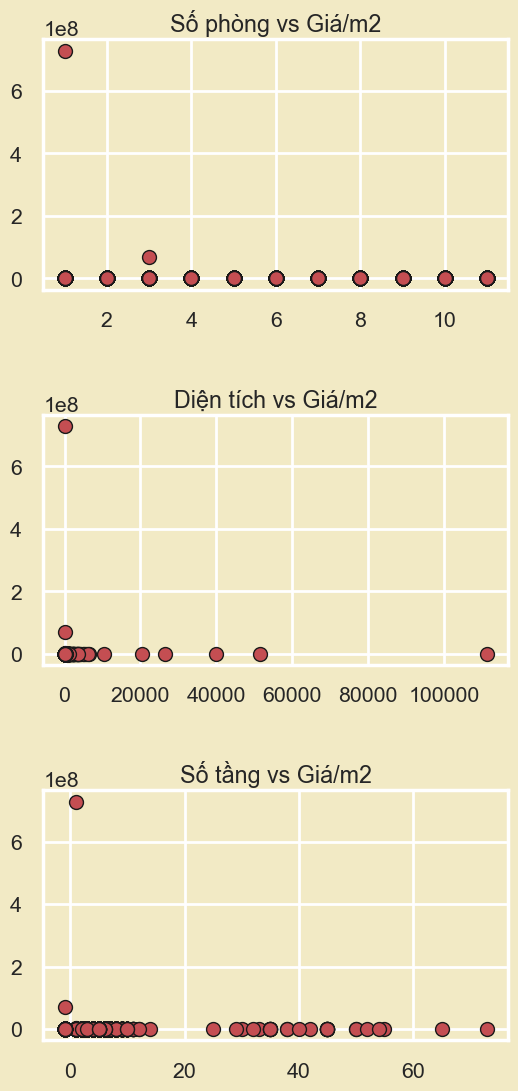

In [22]:
#Xem sự phân bố của số tầng, số phòng và diện tích
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(6,13))

ax1.plot(data[:,1],data[:,0],c='r',marker='o',ms=10,mec='k',ls='none');
ax1.set_title('Số phòng vs Giá/m2');

ax2.plot(data[:,2],data[:,0],c='r',marker='o',ms=10,mec='k',ls='none');
ax2.set_title('Diện tích vs Giá/m2');

ax3.plot(data[:,3],data[:,0],c='r',marker='o',ms=10,mec='k',ls='none');
ax3.set_title('Số tầng vs Giá/m2');

plt.subplots_adjust(hspace=0.5)

👉 Loại outliers bằng phương pháp IQR

In [23]:
# Xác định phạm vi IQR cho thuộc tính 'Diện tích' và 'Giá/m2'
for i in [0,2]:
    q1 = np.percentile(data[:,i], 25)
    q3 = np.percentile(data[:,i], 75)
    iqr = q3 - q1

    # Tính các ngưỡng outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Loại bỏ outliers
    data = data[~((data[:,i] < lower_bound) | (data[:,i] > upper_bound))]

👉 Lấy ra các biến thuộc tính và biến đầu ra từ tập dữ liệu.

In [24]:
X=data[:,1:]
y=data[:,0]

In [25]:
#add bias unit
X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
X

array([[ 1.,  5., 46., ...,  0.,  0.,  1.],
       [ 1.,  3., 37., ...,  0.,  0.,  0.],
       [ 1.,  4., 40., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  3., 38., ...,  0.,  0.,  0.],
       [ 1.,  4., 60., ...,  0.,  0.,  1.],
       [ 1.,  4., 45., ...,  0.,  0.,  0.]])

👉 Bước tiếp theo là **Phân tách bộ dữ liệu thành 2 tập training set và validation set**:

- Mục đích: Bất cứ khi nào chúng ta đào tạo một mô hình học máy, chúng ta không thể đào tạo mô hình đó trên một tập dữ liệu hoặc thậm chí chúng ta đào tạo nó trên một tập dữ liệu duy nhất thì chúng ta sẽ không thể đánh giá hiệu suất của mô hình của mình do tập dữ liệu đã được mô hình học thuộc lòng thì việc đánh giá sẽ luôn đạt tỉ lệ đúng rất cao và có thể lên đến 100% dẫn đến hiện tượng over fitting - Không tổng quát khi áp dụng vào dữ liệu thực tế.
- Ví dụ dễ hiểu là nếu bạn giải đề thi toán và được giáo viên cho một bộ các câu hỏi có thể ra thi, nếu bạn đã ôn rất kĩ những câu hỏi đó đến mức nhớ cách giải rõ ràng cho từng câu hỏi và sau đó khi đến ngày thi nếu giáo viên ra đề thi với các câu hỏi giống như trong bộ đề bạn đã ôn thì chắc chắn khả năng rất cao bạn sẽ được 10đ, do đó giáo viên không đánh giá chính xác nhất được khả năng tư duy giải toán hay hiểu vấn đề của học sinh mà chỉ đơn thuần là học thuộc lòng cách giải của từng câu hỏi. Giải pháp hiệu quả hơn cho việc đánh giá sẽ là phân chia bộ các câu hỏi ban đầu ra thành 2 phần là bộ câu hỏi cho học sinh ôn tập và bộ câu hỏi để ra đề thi khi đó buộc học sinh phải vận dụng, am hiểu những kiến thức trong quá trình ôn luyện vào giải đề thi. 
- Vì lý do đó, chúng ta chia dữ liệu nguồn của mình thành 2 tập training set và validation set.
- Kích thước mỗi tập như sau:
    + Size of Training set = 80% * (Size of Dataset).
    + Size of Validation set = 20% * (Size of Dataset).

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(13)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

**🗺️ Feature Scaling**

- Khi khoảng giá trị giữa 2 cột dữ liệu quá cách xa nhau thì việc mô hình hóa cũng như trực quan mối quan hệ có thể gặp khó khăn, do đó phải thực hiện kĩ thuật 'Feature Scaling' hay việt hóa là 'Co giãn thuộc tính'.
- Có 3 phương pháp feature scaling chính là:
    + Standardisation (Chính quy hóa): Làm cho tập dữ liệu có trung bình là 0 và độ lệch chuẩn là 1 và được áp dụng cho hầu hết các trường hợp cần feature scaling.
    + Normalisation (Tiêu chuẩn hóa): Làm cho các giá trị trong tập dữ liệu thuộc đoạn [0, 1] và được áp dụng nếu tập dữ liệu tuân theo phân phối chuẩn.
    + MinMax Scaler: Đưa các giá trị về khoảng giữa 2 giá trị min và max trong miền giá trị của thuộc tính, có thể là đoạn [-1, 0], [0, 1], [-1, 1],...
- Trong bài này nhóm chọn phương pháp Standardisation để scaling khoảng giá trị của thuộc tính và khoảng giá trị của cột mục tiêu 'Giá/m2' về khoảng gần với nhau hơn.

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [29]:
X_train[:,1:4]=sc_X.fit_transform(X_train[:,1:4])

In [30]:
X_train[:5,:]

array([[ 1.        ,  0.20614003,  1.00017166,  0.93873691,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  1.77020865,  0.45842687,  1.29371982,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.

In [31]:
y_train[:5]

array([ 58.65, 121.74, 150.  , 137.5 , 130.  ])

**🛠 Implementation Cost Function with Regularization**

In [32]:
def computeCostFunctionReg(X, y, theta, lambda_):
    m = y.size  # number of training examples
    
    # init the cost function's value is equal to 0.
    J = 0
    
    # compute cost function J.
    theta_to_compute=theta[1:]
    J=(1/(2*m))*(np.sum(np.square(np.dot(X,theta.reshape(-1,1))-y.reshape(-1,1)),axis=0) + lambda_*np.sum(np.square(theta_to_compute)))

    return J

**🛠 Implementation Gradient Descent with Regularization**

In [33]:
def gradientDescentReg(X,y,theta,alpha,lambda_,num_iters):
    m = y.shape[0]  # number of training examples
    
    theta = theta.copy()
    
    J_records = [] # to track value of J throw each iteration.
    
    for i in range(num_iters):
        temp=theta.copy()
        for j in range(len(theta)):
            if j==0:
                theta[0]=temp[0]-alpha*(1/m)*np.sum((np.dot(X,temp.reshape(-1,1))-y.reshape(-1,1)).squeeze())
            else:
                theta[j]=temp[j]*(1-(alpha*(lambda_/m)))-alpha*(1/m)*np.sum((np.dot(X,temp.reshape(-1,1))-y.reshape(-1,1)).squeeze()*X[:,j])
        
        # save the cost J in every iteration
        J_records.append(computeCostFunctionReg(X, y, theta, lambda_))
    
    return theta, J_records

In [34]:
# initialize fitting parameters
theta = np.zeros(X_train.shape[1])
# some gradient descent settings
iterations = 1000
alpha = 0.01 #learning rate
lambda_=1

theta, J_history = gradientDescentReg(X_train ,y_train, theta, alpha, lambda_, iterations)

In [35]:
theta

array([ 5.55398533e+01,  6.68467084e+00, -2.78891326e+00, -1.70729111e+00,
        0.00000000e+00, -1.26006785e-02, -3.62967041e-01, -1.35374301e+00,
       -9.86665443e-03,  0.00000000e+00,  0.00000000e+00, -3.05507756e-05,
       -8.68459463e-03, -4.95902506e-02, -2.18740030e-01, -2.44375696e+00,
       -2.10139885e-02,  0.00000000e+00, -2.34820856e-02, -2.87167075e-01,
        8.34578243e+00,  2.05380540e-01,  1.09838053e+01,  8.43045199e+00,
        4.16534830e-01,  5.31027207e-01, -1.78120949e+00,  7.65585013e-01,
        1.77722694e+00,  1.01528286e+01,  5.21009073e+00,  1.53044456e+01,
       -1.32516454e-02,  1.06772147e+00,  2.81103307e+01,  2.01513458e+01,
        6.13094307e+00, -1.62295277e-01,  1.46541189e-02,  8.59254771e+00])

Text(0, 0.5, 'Cost J')

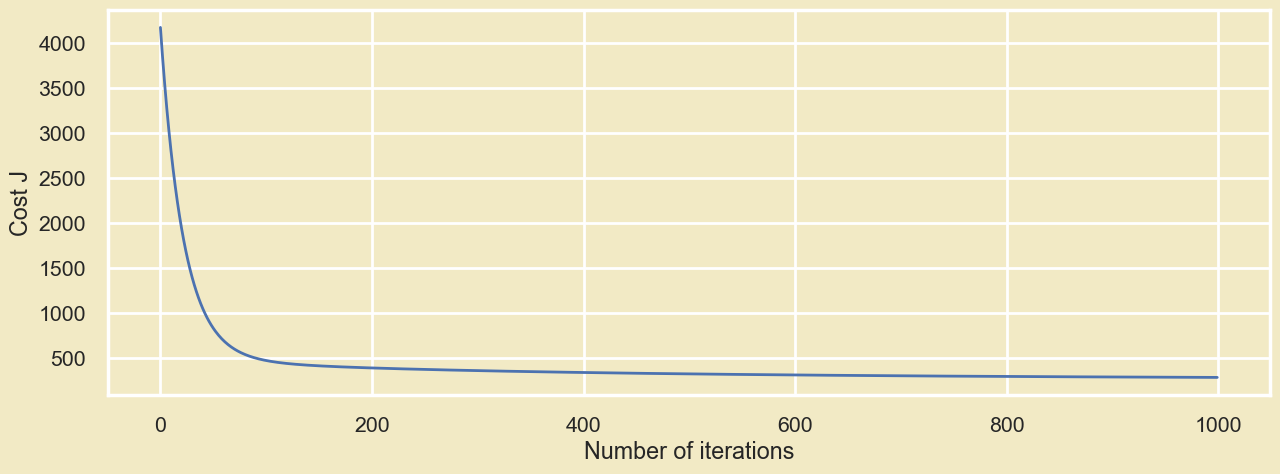

In [36]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [37]:
J_history[-1]

array([283.52734344])

In [38]:
#Feature scaling cho tập Validation
X_val[:,1:4]=sc_X.transform(X_val[:,1:4])
#y_val=sc_y.transform(y_val.reshape(-1,1)).squeeze()

In [39]:
computeCostFunctionReg(X_val,y_val,theta,lambda_)

array([288.57012504])

👉 Giá trị của Cost Function trên tập Train là 283.5 là và khi kiểm nghiệm trên tập Validation là 288.6.

**🛠 Implementation Normal Equation with Regularization**

In [40]:
def normalEquationReg(X, y, lambda_, A):
    theta = np.zeros(X.shape[1])
    
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + lambda_*A),X.T),y.reshape(-1,1))
    theta=theta.squeeze()

    return theta

In [41]:
A=np.diag(np.full(X_train.shape[1],1))
A[0,0]=0
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [42]:
theta_eqn = normalEquationReg(X_train, y_train, lambda_, A)
theta_eqn

array([ 78.24670063,   5.55681292,  -3.4409584 ,   1.65842091,
         0.        , -28.24940495, -12.2307885 , -15.03495075,
        -9.42259186,   0.        ,   0.        ,  -6.47741554,
       -21.30955049, -37.81759639, -21.62087721,  -5.24742155,
       -27.75060703,   0.        , -15.42219366, -25.32592693,
        32.4911586 ,  10.46267019,  32.3826265 ,  22.63672692,
        24.3883567 ,  12.28792745,   5.42160741,  11.2609409 ,
        16.66308664,  24.47481768,  30.30226683,  30.73805357,
       -23.55338945,  11.0308291 ,   5.36475047, -10.11926978,
         9.97916107, -22.54774884, -16.80316669,  -2.80281646])

In [43]:
computeCostFunctionReg(X_val,y_val,theta_eqn,lambda_)

array([249.28051109])

👉 Giá trị của Cost Function khi tìm nghiêm bằng Normal equation cho kết quả tốt hơn đôi chút.

### <span style='color:#2B9C15'>Đánh giá mô hình (Evaluation)</span>

🗺️  Dùng $R^{2} Score$ để đánh giá độ phù hợp của mô hình. Điểm số tốt nhất có thể có là 1.0 và có thể có giá trị âm (mô hình cho ra kết quả quá tệ).

🗺️ $R^{2} Score$ sẽ cho biết tỷ lệ các điểm dữ liệu nằm gần đường tuyến tính như thế nào. Nếu càng nhiều điểm dữ liệu trong bộ dữ liệu nằm gần đường tuyến tình thì điểm càng cao và ngược lại. 

**🗺️ $R^{2} Score$:**

$R^{2}$ được định nghĩa bằng công thức: $$(1 - \frac{u}{v})$$ với u = sum( (y_true - y_pred)^2 )

v = sum( (y_true - y_true.mean( ) )^2)

**🛠 Implementation $R^{2} Score$:**

In [44]:
def r2Score(y_true, y_pred):
    u = np.sum(np.square(y_true - y_pred))
    v = np.sum(np.square(y_true - np.mean(y_true)))
    return 1 - (u/v)

In [45]:
#tính R^2 Score
print(r2Score(y_val.round(2), np.dot(X_val,theta).round(2)))

0.15145665362144878


In [46]:
y_truth = y_val.round(2)
preds = np.dot(X_val,theta).round(2)
result = pd.DataFrame({'Truth':y_truth, 'Predictions':preds})
result

,Truth,Predictions
0,90.00,81.18
1,88.24,81.72
2,111.25,92.25
3,75.00,86.17
4,62.86,97.01
...,...,...
14096,90.00,76.74
14097,105.00,87.00
14098,133.33,89.62
14099,112.20,97.75


**Nhận xét:**

- $R^{2}$ score chỉ đạt 0.15, từ đó có thể thấy được tính không phù hợp của mô hình hồi quy tuyến tính trên bộ dữ liệu này.
- Lý do không phù hợp có thể là do:
    + Nếu chỉ xét riêng về vị trí địa lý thì những quận ở trung tâm như Cầu Giấy, Hoàn Kiếm, Ba Đình, Hai Bà Trưng, Đống Đa sẽ có giá đất rất mắc hơn so với các quận vùng ven khác như Long Biên, Thanh Trì.
    + Tuy nhiên ở các vùng trung tâm thì mật độ dân số lại đông và diện tích xây dựng được phép sẽ hẹp hơn, ta có thể thấy diện tích ngôi nhà thường lớn ở những quận không phải trung tâm trong bộ dữ liệu cũng sẽ ảnh hưởng về giá.
    + Mô hình có thể dự đoán giá của các căn hộ có giá bán từ thấp đến trung bình, nhưng không dự đoán tốt với các căn hộ có giá bán cao.
    + Còn nhiều yếu tố ngoại cảnh ảnh hưởng đến giá bán như chất lượng xây dựng, chất lượng nội thất, giá thầu,...
    + Có thể nhiều chủ căn hộ đăng giá theo cảm tính, như ở phần xem xét sự phân bố của một số thuộc tính thì khi nhìn vào bộ dữ liệu có rất nhiều điểm dữ liệu xếp chồng lên nhau, điều này chứng tỏ với những kích thước gần nhau nhưng giá rất khác biệt nhau.

# IV. Đề xuất giải pháp

- Sự không phù hợp của hồi quy tuyến tính có thể được khắc phục bằng một số đề xuất như sau:
    + Hồi quy đa thức (Polynomial Regression). Tuy nhiên có thể giải pháp này có thể cũng chưa tốt hơn nhiều so với hồi quy tuyến tính vì sự phân bố của dữ liệu có độ phân tán cực kỳ lớn, không có hình dạng của một hàm nhất định nào.
    + Random Forest với những cây con là Regressor Tree.
    + Sử dụng một mạng neural nông (Shallow Neural Network) để phân tích hồi quy.
- Và trong bài làm của nhóm, nhóm sẽ thực hiện giải pháp Shallow Neural Network cho việc cải tiến quy trình phân tích hồi quy. 

# V. Shallow Neural Network

In [47]:
import os

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [48]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1,1)).squeeze()

👉 **Tìm thông số tốt nhất cho mạng thông qua GridSearch (Tìm kiếm lưới)**

**LƯU Ý: NẾU MÁY CÓ CẤU HÌNH YẾU VUI LÒNG BỎ QUA BƯỚC NÀY VÀ SỬ DỤNG KẾT QUẢ MÀ NHÓM ĐÃ TÌM ĐƯỢC. THAY THẾ CÁC giá trị cố định mà nhóm đã tìm được bằng SNN_best_params['...'] trong hàm compile và hàm fit ở cell 'huấn luyện với bộ tham số tốt nhất'.**

**Nếu muốn chạy thử hãy bỏ comment cell phía dưới và run.**

In [49]:
# # Tắt thông báo của tensorflow
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# os.environ["KMP_SETTINGS"] = "false"

# def create_regression_shallowNN(optimizer_trial):
#     model = Sequential()
#     model.add(Dense(units=10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     model.compile(loss='mean_squared_error', optimizer=optimizer_trial)
#     return model

# # Các phiên bản của các tham số
# SNN_params = {'batch_size':[10, 20, 30, 50],
#              'epochs':[10, 20, 50],
#              'optimizer_trial':['adam', 'rmsprop']}

# SNN_model = KerasRegressor(create_regression_shallowNN, verbose=0)

# # Tạo lưới
# SNN_grid_search = GridSearchCV(estimator=SNN_model, param_grid=SNN_params, 
#                                cv=3, n_jobs = -1).fit(X_train, y_train_scaled, verbose=0)
# SNN_best_params = SNN_grid_search.best_params_

# # Bộ tham số tốt nhất
# SNN_best_params

**Bộ tham số tốt nhất: {'batch_size': 30, 'epochs': 50, 'optimizer_trial': 'adam'}**

👉 **Huấn luyện với bộ tham số tốt nhất**

In [50]:
# Khởi tạo Shallow NN
SNN = Sequential()                
SNN.add(Dense(units=10, input_dim=X_train.shape[1], 
                kernel_initializer='normal', activation='relu'))
SNN.add(Dense(1, kernel_initializer='normal'))
SNN.compile(loss='mean_squared_error', optimizer='adam') #SNN_best_params['optimizer_trial'])
SNN.fit(X_train, y_train_scaled,batch_size = 30, #int(SNN_best_params['batch_size']),
        epochs = 50, #int(SNN_best_params['epochs']),
        verbose=0)

# Dự đoán trên tập validation
SNN_predictions = sc_y.inverse_transform(SNN.predict(X_val)).squeeze()
 
#tính R^2 Score
print(r2Score(y_val.round(2), SNN_predictions.round(2)))

441/441 [==============================] - 1s 1ms/step
0.3076514731373048


In [51]:
result = pd.DataFrame({'Truth':y_val, 'Predictions':SNN_predictions})
result

,Truth,Predictions
0,90.00,85.713326
1,88.24,88.654152
2,111.25,86.879158
3,75.00,92.343307
4,62.86,94.622620
...,...,...
14096,90.00,78.616135
14097,105.00,102.097359
14098,133.33,92.959686
14099,112.20,113.786270


${R}^{2} score$ đạt xấp xỉ 0.3, tốt hơn nhiều so với mô hình hồi quy tuyến tính ban đầu.